# Tutorial9_Submission

This notebook will contain my submission for tutorial 9

# Libraries

In [17]:
# system libraries

import sys
sys.path.insert(0,'..')

# mathematical

import numpy as np

# data exploration

import pandas as pd

# data visualisation

import matplotlib.pyplot as plt
from Extra_Work.PythonFiles.plotting import plot_classes

# modelling

from sklearn.cluster import KMeans

# other configuration

plt.style.use('ggplot')

# Task (A)

We have a circuit to analyse that has two inputs and two outputs. 

Assumptions:
- The inputs are continuous voltages from 0 to 10V
- The outputs are stateless, i.e. no dependence on what happened before

The output voltages explain 1 of 3 classes for the various inputs.

Each of these states is indicated by a combination of the voltages.

The first task, Task (A) requires you to find the combinations which make 3 distinct classes.

In [4]:
# import data
path = '../Data/volts.csv'

df = pd.read_csv(path)

df.head()

,x1,x2,y1,y2
0,5.488135,7.482680,6.859985,7.513852
1,7.151894,1.802027,2.087877,6.657288
2,6.027634,3.890231,3.115369,6.099800
3,5.448832,0.376002,6.692478,9.618781
4,4.236548,0.117877,5.557551,7.381141


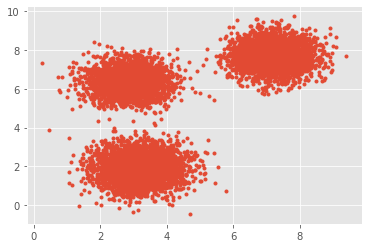

In [8]:
# visualise the points

plt.plot(df['y1'],df['y2'],'.')

This is a classic KMeans problem... we see exactly 3 classes that are not intersecting massively, and therefore we can construct a KMeans object that can classify the centres of these classes. Each centre would then provide the 'voltages' that make up the classes, plus a certain level of uncertainty (the standard deviation). The latter can be analysed later.

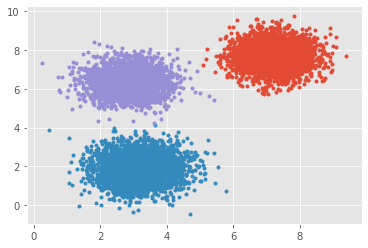

In [20]:
# define data
X = np.asarray(df[['y1','y2']])

# construct KMeans classifier

model = KMeans(n_clusters = 3)
yhat = model.fit_predict(X)


fig, ax = plot_classes(X, yhat)

In [24]:
# centres
model.cluster_centers_

array([[7.19831173, 7.70619219],
       [3.19462558, 1.91429061],
       [2.88507126, 6.39672699]])

In [26]:
df['y'] = yhat
df.head()

,x1,x2,y1,y2,y
0,5.488135,7.482680,6.859985,7.513852,0
1,7.151894,1.802027,2.087877,6.657288,2
2,6.027634,3.890231,3.115369,6.099800,2
3,5.448832,0.376002,6.692478,9.618781,0
4,4.236548,0.117877,5.557551,7.381141,0


# Task (B)

Create a classifier, based on y, using a random forest with 100 trees and max depth = 20. Once done, create a contour plot of the decision function.